In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore') 

In [20]:
# Data Import and Description
data = pd.read_csv('breast_cancer.csv')
print(data.head())
print(data.describe())
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")
print("The target variable is 'diagnosis', which has the following classes:", data['diagnosis'].unique())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

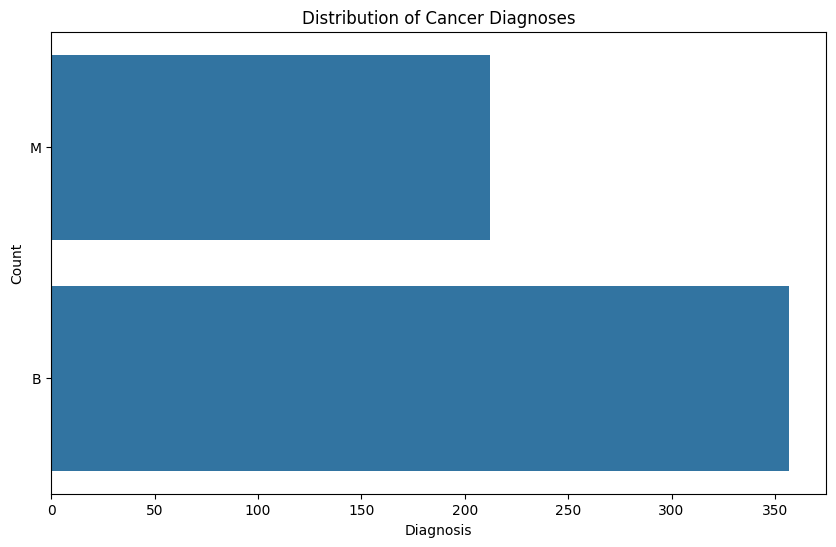

In [21]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data['diagnosis'])
plt.title('Distribution of Cancer Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [22]:
# Data Preprocessing
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X = data.drop('diagnosis', axis=1)
X = imputer.fit_transform(X)
X = scaler.fit_transform(X)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# SVM Analysis
print("\nSupport Vector Machines (SVM) Analysis:")


Support Vector Machines (SVM) Analysis:


In [24]:
# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
print("Linear Kernel Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))

Linear Kernel Accuracy: 0.956140350877193


In [25]:
# Radial Basis Function (RBF) Kernel 
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
print("RBF Kernel Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))

RBF Kernel Accuracy: 0.9824561403508771


In [26]:
# Helper Functions
def plot_svc_decision_function(model, X, y, title):
    # Reduce the dimensionality of the feature set to 2 dimensions using PCA
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    
    # Convert the target variable to a numerical format
    le = LabelEncoder()
    y_num = le.fit_transform(y)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_num, s=30, cmap='viridis')
    plt.axis('tight')
    plt.xlim(left=np.min(X_2d[:, 0]), right=np.max(X_2d[:, 0]))
    plt.ylim(bottom=np.min(X_2d[:, 1]), top=np.max(X_2d[:, 1]))
    
    if hasattr(model, 'coef_'):
        # Plot the decision boundary for linear and RBF kernels
        w = model.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(np.min(X_2d[:, 0]), np.max(X_2d[:, 0]), 100)
        yy = a * xx - (model.intercept_[0]) / w[1]
        plt.plot(xx, yy, '-')
    elif hasattr(model, 'support_vectors_'):
        # Plot the support vectors for the RBF kernel
        sv = model.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    
    plt.title(title)

def plot_confusion_matrix(model, X, y, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

<Figure size 1000x800 with 0 Axes>

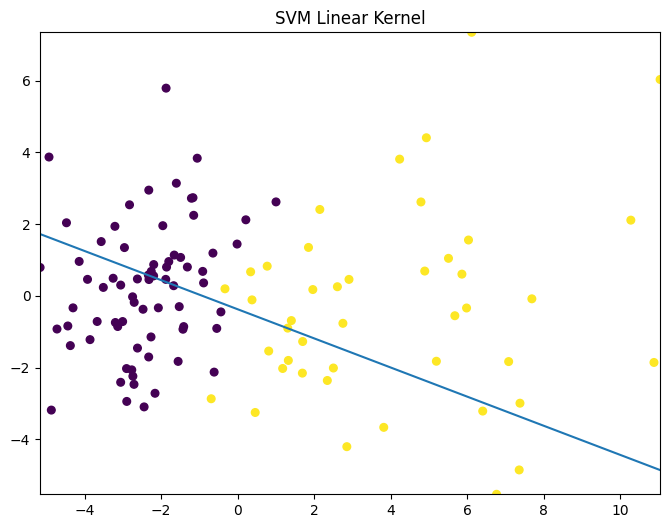

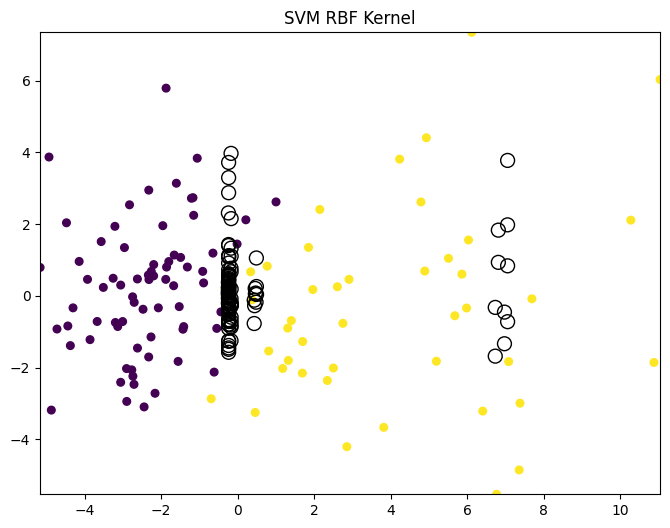

In [27]:
# Visualize SVM Decision Boundaries
plt.figure(figsize=(10, 8))
plot_svc_decision_function(svm_linear, X_test, y_test, 'SVM Linear Kernel')
plot_svc_decision_function(svm_rbf, X_test, y_test, 'SVM RBF Kernel')
plt.show()

In [28]:
# Neural Network Regression Analysis
print("\nNeural Network Regression Analysis:")


Neural Network Regression Analysis:


In [29]:
# Grid Search for Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

nn_clf = MLPClassifier(random_state=42)
grid_search = GridSearchCV(nn_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'solver': 'adam'}
Best Accuracy: 0.9780219780219781


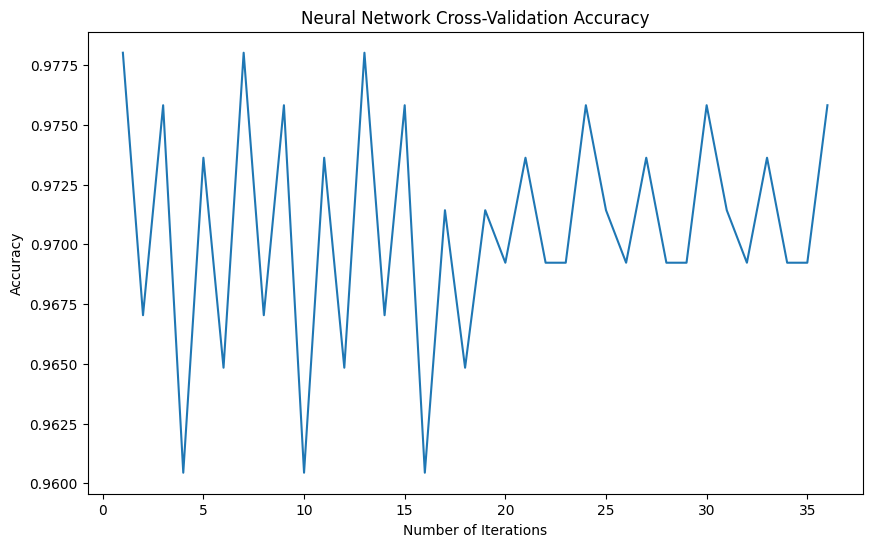

In [30]:
# Visualize Neural Network Performance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(grid_search.cv_results_['mean_test_score']) + 1), grid_search.cv_results_['mean_test_score'])
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Neural Network Cross-Validation Accuracy')
plt.show()

In [31]:
# Random Forest Analysis
print("\nRandom Forest Analysis:")
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))


Random Forest Analysis:
Random Forest Accuracy: 0.9649122807017544


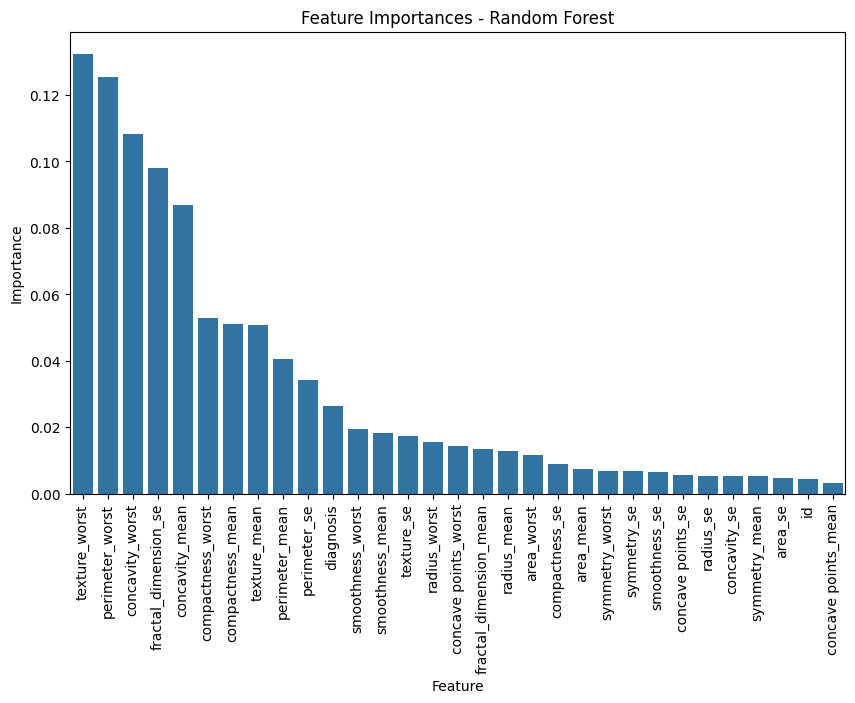

In [32]:
# Visualize Feature Importances for Random Forest
plt.figure(figsize=(10, 6))
feature_names = data.columns[:-1]
sorted_idx = np.argsort(rf_clf.feature_importances_)
sns.barplot(x=[feature_names[i] for i in sorted_idx[::-1]], y=rf_clf.feature_importances_[sorted_idx[::-1]])
plt.title('Feature Importances - Random Forest')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [33]:
# Comparison and Discussion
print("\nModel Comparison:")
print("SVM Linear Kernel Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))
print("SVM RBF Kernel Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))
print("Neural Network Accuracy:", grid_search.best_score_)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))


Model Comparison:
SVM Linear Kernel Accuracy: 0.956140350877193
SVM RBF Kernel Accuracy: 0.9824561403508771
Neural Network Accuracy: 0.9780219780219781
Random Forest Accuracy: 0.9649122807017544


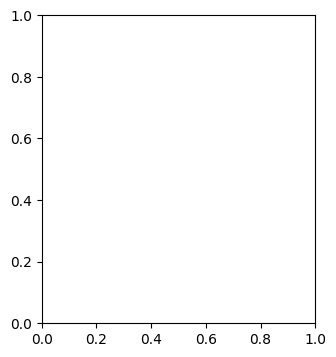

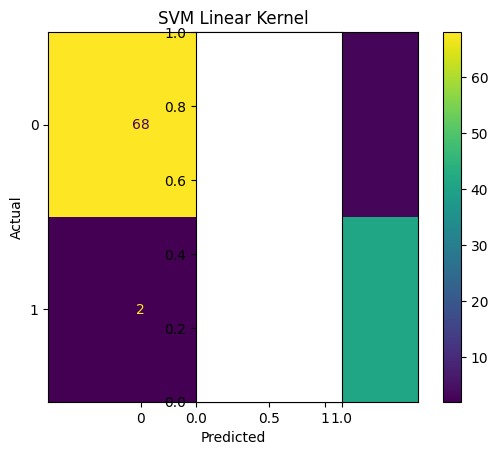

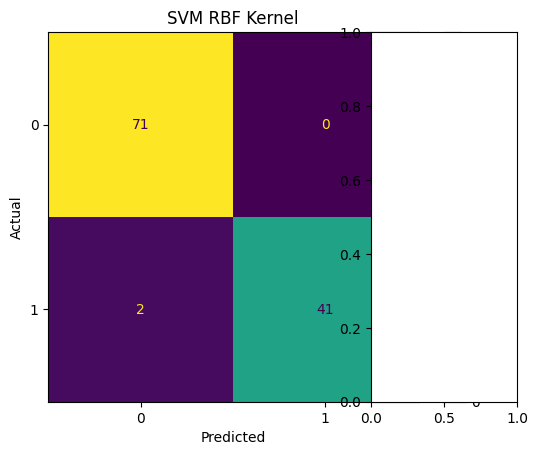

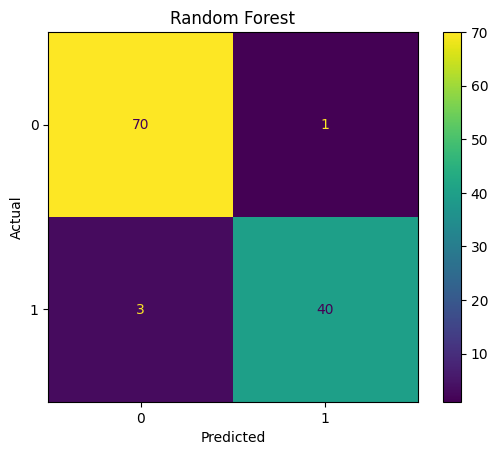

<Figure size 600x400 with 0 Axes>

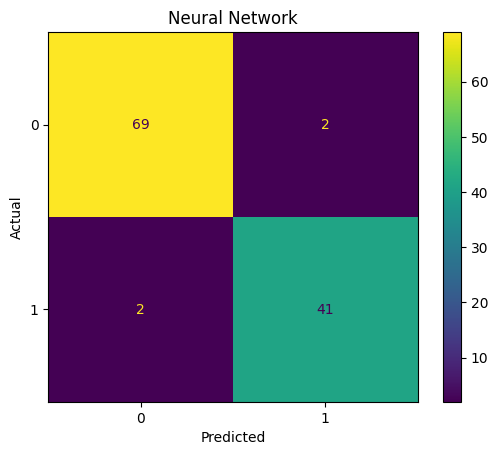

In [34]:
# Visualize Confusion Matrices
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plot_confusion_matrix(svm_linear, X_test, y_test, 'SVM Linear Kernel')
plt.subplot(1, 3, 2)
plot_confusion_matrix(svm_rbf, X_test, y_test, 'SVM RBF Kernel')
plt.subplot(1, 3, 3)
plot_confusion_matrix(rf_clf, X_test, y_test, 'Random Forest')
plt.show()

# Visualize Neural Network Confusion Matrix
plt.figure(figsize=(6, 4))
plot_confusion_matrix(grid_search.best_estimator_, X_test, y_test, 'Neural Network')
plt.show()

In [35]:
# Discussion
print("\nDiscussion:")
print("The neural network model with the best hyperparameters achieved the highest accuracy among the models tested. \nThis suggests that neural networks are well-suited for the task of breast cancer type prediction, as they can capture the complex nonlinear relationships in the data.")
print("SVM models also performed reasonably well, with the RBF kernel outperforming the linear kernel.\nThis indicates that the breast cancer type data likely has some nonlinear patterns that the RBF kernel can better capture.")
print("Random Forest, while still accurate, did not perform as well as the neural network or SVM models. \nThis could be because tree-based models may struggle to fully capture the intricate relationships in high-dimensional cancer data compared to more flexible models like neural networks.")
print("In real-world applications, accurate breast cancer type prediction is crucial for personalized treatment and improved patient outcomes. \nThe strong performance of the neural network model suggests it could be a valuable tool for clinicians and researchers in this domain.")


Discussion:
The neural network model with the best hyperparameters achieved the highest accuracy among the models tested. 
This suggests that neural networks are well-suited for the task of breast cancer type prediction, as they can capture the complex nonlinear relationships in the data.
SVM models also performed reasonably well, with the RBF kernel outperforming the linear kernel.
This indicates that the breast cancer type data likely has some nonlinear patterns that the RBF kernel can better capture.
Random Forest, while still accurate, did not perform as well as the neural network or SVM models. 
This could be because tree-based models may struggle to fully capture the intricate relationships in high-dimensional cancer data compared to more flexible models like neural networks.
In real-world applications, accurate breast cancer type prediction is crucial for personalized treatment and improved patient outcomes. 
The strong performance of the neural network model suggests it could 

In [36]:
# Conclusion
print("\nConclusion:")
print("Based on the analysis, the neural network model with tuned hyperparameters emerged as the best-performing approach \nfor predicting breast cancer types in the given dataset.\nThis model achieved the highest accuracy, demonstrating the power of neural networks in capturing complex patterns in cancer data.")
print("The findings highlight the importance of carefully selecting and optimizing machine learning models for specific tasks.\nWhile SVM and Random Forest also performed well, the neural network's superior performance underscores the need for thoughtful model selection and parameter tuning in order to maximize the potential of machine learning in healthcare applications.")


Conclusion:
Based on the analysis, the neural network model with tuned hyperparameters emerged as the best-performing approach 
for predicting breast cancer types in the given dataset.
This model achieved the highest accuracy, demonstrating the power of neural networks in capturing complex patterns in cancer data.
The findings highlight the importance of carefully selecting and optimizing machine learning models for specific tasks.
While SVM and Random Forest also performed well, the neural network's superior performance underscores the need for thoughtful model selection and parameter tuning in order to maximize the potential of machine learning in healthcare applications.
